In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Market Channel Analysis

Goals : Find optimum media

In [78]:
#importing data
df=pd.read_csv(r"/content/drive/MyDrive/Assignment/Copy of attribution_data_market.csv")
df.head(10)

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search
5,0000nACkD9nFkBBDECD3ki00E,2018-07-03T23:36:49Z,impression,0,0.0,Paid Search
6,0000nACkD9nFkBBDECD3ki00E,2018-07-10T22:24:41Z,impression,0,0.0,Paid Search
7,0000nACkD9nFkBBDECD3ki00E,2018-07-10T22:24:44Z,impression,0,0.0,Paid Search
8,0000nACkD9nFkBBDECD3ki00E,2018-07-11T21:21:46Z,impression,0,0.0,Paid Search
9,0000nACkD9nFkBBDECD3ki00E,2018-07-11T22:19:53Z,impression,0,0.0,Paid Search


## Data understanding and cleaning

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586737 entries, 0 to 586736
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cookie            586737 non-null  object 
 1   time              586737 non-null  object 
 2   interaction       586737 non-null  object 
 3   conversion        586737 non-null  int64  
 4   conversion_value  586737 non-null  float64
 5   channel           586737 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 26.9+ MB


In [80]:
cookie_len = df['cookie'].apply(lambda x: len(x))
cookie_len.unique()
#lengths is 25

array([25])

In [81]:
df['time']=pd.to_datetime(df['time'])
df['time'].tail()

586732   2018-07-12 23:50:45+00:00
586733   2018-07-12 23:50:54+00:00
586734   2018-07-03 12:57:25+00:00
586735   2018-07-19 08:17:59+00:00
586736   2018-07-14 17:17:12+00:00
Name: time, dtype: datetime64[ns, UTC]

In [82]:
df["interaction"].value_counts()

impression    569098
conversion     17639
Name: interaction, dtype: int64

In [83]:
df["channel"].value_counts()

Facebook          175741
Paid Search       151440
Online Video      113302
Instagram          75201
Online Display     71053
Name: channel, dtype: int64

In [84]:
df["conversion_value"].describe()

count    586737.000000
mean          0.187871
std           1.084498
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.500000
Name: conversion_value, dtype: float64

In [85]:
df["conversion_value"].value_counts()

0.0    569098
6.5      3509
6.0      3487
5.0      1841
7.5      1833
5.5      1792
7.0      1780
8.0       866
4.5       863
4.0       835
8.5       833
Name: conversion_value, dtype: int64

In [86]:
df["conversion"].value_counts()

0    569098
1     17639
Name: conversion, dtype: int64

In [87]:
df.loc[df['interaction']=='conversion']

,cookie,time,interaction,conversion,conversion_value,channel
22,0007oEBhnoF97AoEE3BCkFnhB,2018-07-06 13:45:29+00:00,conversion,1,6.5,Paid Search
23,00090n9EBBEkA000C7Cik999D,2018-07-05 06:53:53+00:00,conversion,1,8.0,Facebook
83,000h3n9nC0hFhE3CCnkkAof7n,2018-07-19 14:31:57+00:00,conversion,1,6.0,Facebook
109,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-25 11:15:16+00:00,conversion,1,6.5,Online Video
124,000kiDB3D0fCfDAohCDB3ohko,2018-07-26 16:16:21+00:00,conversion,1,7.5,Facebook
...,...,...,...,...,...,...
586663,oooEAi9EoC7F3A33037h0khk3,2018-07-25 14:42:17+00:00,conversion,1,7.0,Online Video
586690,oooh7FDi0hBnEDBii70hfEf93,2018-07-27 19:25:29+00:00,conversion,1,6.0,Online Display
586701,oooik3A7A7FA9oof3hDfin7CB,2018-07-12 08:53:23+00:00,conversion,1,7.5,Online Display
586707,oookCEDh03D7oo3f0FkB799E7,2018-07-29 21:25:54+00:00,conversion,1,6.0,Online Video


In [102]:
df['interaction']=df['interaction'].replace(to_replace=["conversion","impression"],value=[1,0]).astype('float64')

In [88]:
# df.drop(columns = 'interaction', inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586737 entries, 0 to 586736
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   cookie            586737 non-null  object             
 1   time              586737 non-null  datetime64[ns, UTC]
 2   interaction       586737 non-null  float64            
 3   conversion        586737 non-null  int64              
 4   conversion_value  586737 non-null  float64            
 5   channel           586737 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(2)
memory usage: 26.9+ MB


## EDA

In [90]:
print('Unique total users: {}'.format(df['cookie'].nunique()))
print("Unique users converted: {}".format(df.loc[df['conversion']==1,'cookie'].nunique()))

Unique total users: 240108
Unique users converted: 17639


In [91]:
# user_converted/total_users
17639/240108*100

7.346277508454528

## Analysis

In [92]:
channel_count=df['channel'].value_counts(sort=True,ascending=False)
channel_count

Facebook          175741
Paid Search       151440
Online Video      113302
Instagram          75201
Online Display     71053
Name: channel, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


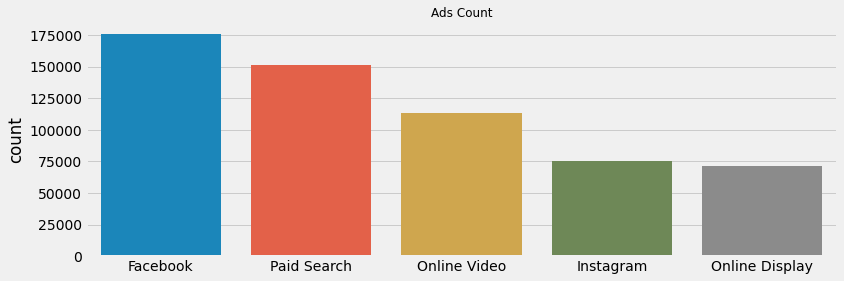

In [93]:
plt.figure(figsize=(12,4))
ax=sns.countplot(df['channel'],order=channel_count.index)
plt.xlabel("")
plt.title("Ads Count",fontsize=12);

**Pivoting the ads count by channel**

***Pivot per day***

In [94]:
df_per_day =df.copy()

In [95]:
df_per_day['time'] = pd.to_datetime(df['time']).dt.date

In [96]:
df_per_day

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03,impression,0,0.0,Paid Search
...,...,...,...,...,...,...
586732,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12,impression,0,0.0,Online Display
586733,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12,impression,0,0.0,Online Display
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03,impression,0,0.0,Paid Search
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19,impression,0,0.0,Online Video


In [97]:

daily_ads_count=df_per_day.pivot_table(values="cookie",index="time", columns="channel", aggfunc=len)
daily_ads_count.head(20)

channel,Facebook,Instagram,Online Display,Online Video,Paid Search
time,,,,,
2018-07-01,5037,2107,2572,1649,3215
2018-07-02,6165,2629,2456,2407,5895
2018-07-03,5438,2347,2428,2397,8665
2018-07-04,5856,2447,2445,2330,8496
2018-07-05,5634,2325,6,2152,5851
2018-07-06,5289,2273,1843,1589,3873
2018-07-07,5747,2442,2173,2306,4907
2018-07-08,5409,2277,7,2867,6627
2018-07-09,4949,2113,2648,3656,5237


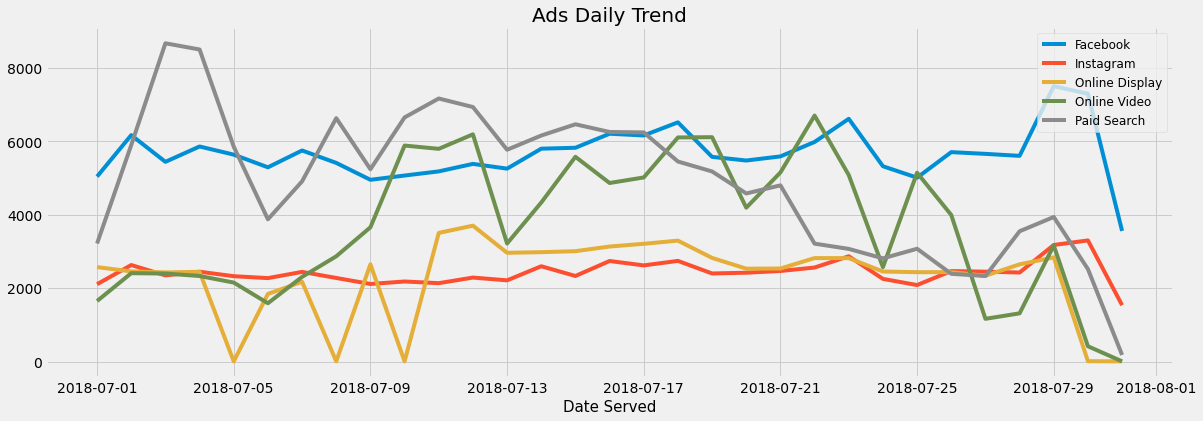

In [98]:
plt.style.use('fivethirtyeight')
daily_ads_count.plot(kind='line',figsize=(18,6))
plt.xlabel("Date Served",size=15);
plt.title("Ads Daily Trend",size=20)
plt.legend(loc='upper right',fontsize=12);

- Online display and instagram are the lowest amount of user impression
- Online video has fluctuation behavior
- Facebook also has fluctuation but remain in the top
- All channels have down trend except Facebook

***Pivot per hour***

In [99]:

hour_ads_count=df.pivot_table(values="cookie",index="time", columns="channel", aggfunc=len)
hour_ads_count.head(20)

channel,Facebook,Instagram,Online Display,Online Video,Paid Search
time,,,,,
2018-07-01 13:13:16+00:00,1.0,NaN,NaN,NaN,NaN
2018-07-01 13:13:27+00:00,1.0,NaN,NaN,NaN,NaN
2018-07-01 13:13:41+00:00,1.0,NaN,NaN,NaN,NaN
2018-07-01 13:14:05+00:00,NaN,1.0,NaN,NaN,NaN
2018-07-01 13:14:42+00:00,NaN,1.0,NaN,NaN,NaN
2018-07-01 13:15:12+00:00,NaN,1.0,NaN,NaN,NaN
2018-07-01 13:15:41+00:00,1.0,NaN,NaN,NaN,NaN
2018-07-01 13:16:05+00:00,1.0,NaN,NaN,NaN,NaN
2018-07-01 13:16:24+00:00,1.0,NaN,NaN,NaN,NaN


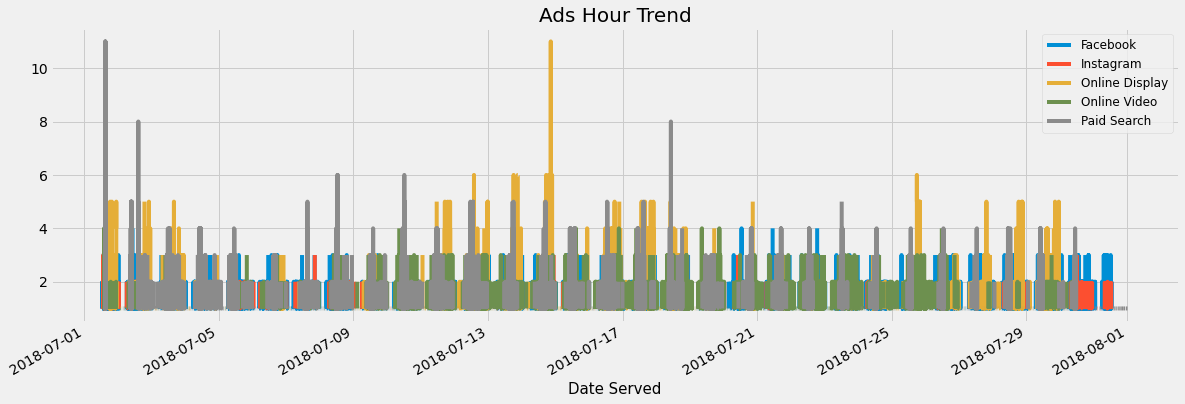

In [100]:
plt.style.use('fivethirtyeight')
hour_ads_count.plot(kind='line',figsize=(18,6))
plt.xlabel("Date Served",size=15);
plt.title("Ads Hour Trend",size=20)
plt.legend(loc='upper right',fontsize=12);

- Online display has a growth in early, middle and end of the month
- Paid search and facebook growth is remain above average
- Instagram and Online video has lower impression among all channels

In [101]:
conversions=df.groupby('channel')['conversion'].sum()
ads=df.groupby('channel')['conversion'].count()
conversion_df=pd.concat([conversions,ads],axis=1)
conversion_df.columns=['conversions','ads_served']
conversion_df

,conversions,ads_served
channel,,
Facebook,5301,175741
Instagram,2244,75201
Online Display,2139,71053
Online Video,3408,113302
Paid Search,4547,151440


In [105]:
conversions=df.groupby('channel')['interaction'].sum()
ads=df.groupby('channel')['interaction'].count()
conversion_df=pd.concat([conversions,ads],axis=1)
conversion_df.columns=['conversions/interaction','ads_served']
conversion_df

,conversions/interaction,ads_served
channel,,
Facebook,5301.0,175741
Instagram,2244.0,75201
Online Display,2139.0,71053
Online Video,3408.0,113302
Paid Search,4547.0,151440


Conversion column and interaction column has the same value, thus we can drop the interaction column

In [106]:
df.drop(columns = ['interaction'], inplace=True)

### Conversion Rate

In [118]:
conversion_df

,conversions/interaction,ads_served,conversion_value(mean)
channel,,,
Facebook,5301.0,175741,0.188593
Instagram,2244.0,75201,0.186693
Online Display,2139.0,71053,0.187163
Online Video,3408.0,113302,0.189035
Paid Search,4547.0,151440,0.187081


In [119]:
conversion_df['conversion_rate(%)'] = conversion_df['conversions']/conversion_df['ads_served']*100

In [115]:
conversion_df['conversion_value(mean)'] =  df.groupby('channel')['conversion_value'].mean()

In [120]:
conversion_df

,conversions,ads_served,conversion_value(mean),conversion_rate(%)
channel,,,,
Facebook,5301.0,175741,0.188593,3.016371
Instagram,2244.0,75201,0.186693,2.984003
Online Display,2139.0,71053,0.187163,3.010429
Online Video,3408.0,113302,0.189035,3.007890
Paid Search,4547.0,151440,0.187081,3.002509


- The higher ads is served, the higher conversions

In [57]:
conversion_df['conversions']

channel
Facebook          5301
Instagram         2244
Online Display    2139
Online Video      3408
Paid Search       4547
Name: conversions, dtype: int64

In [59]:
conversions=df.groupby(['conversion_value','channel'])['conversion'].sum()
ads=df.groupby(['conversion_value','channel'])['conversion'].count()
conversion_df=pd.concat([conversions,ads],axis=1)
conversion_df.columns=['conversions','ads_served']
conversion_df

conversions  ads_served
conversion_value channel                                
0.0              Facebook                  0      170440
                 Instagram                 0       72957
                 Online Display            0       68914
                 Online Video              0      109894
                 Paid Search               0      146893
4.0              Facebook                272         272
                 Instagram                97          97
                 Online Display           98          98
                 Online Video            140         140
                 Paid Search             228         228
4.5              Facebook                246         246
                 Instagram               115         115
                 Online Display          123         123
                 Online Video            165         165
                 Paid Search             214         214
5.0              Facebook                537         537
                 Instagram               240         240
                 Online Display          235         235
                 Online Video            345         345
                 Paid Search             484         484
5.5              Facebook                551         551
                 Instagram               225         225
                 Online Display          207         207
                 Online Video            325         325
                 Paid Search             484         484
6.0              Facebook                999         999
                 Instagram               437         437
                 Online Display          428         428
                 Online Video            711         711
                 Paid Search             912         912
6.5              Facebook               1092        1092
                 Instagram               453         453
                 Online Display          428         428
                 Online Video            661         661
                 Paid Search             875         875
7.0              Facebook                547         547
                 Instagram               230         230
                 Online Display          204         204
                 Online Video            342         342
                 Paid Search             457         457
7.5              Facebook                544         544
                 Instagram               221         221
                 Online Display          223         223
                 Online Video            376         376
                 Paid Search             469         469
8.0              Facebook                257         257
                 Instagram               117         117
                 Online Display          103         103
                 Online Video            178         178
                 Paid Search             211         211
8.5              Facebook                256         256
                 Instagram               109         109
                 Online Display           90          90
                 Online Video            165         165
                 Paid Search             213         213

In [62]:
print(conversion_df['conversions'].sum(level=0))
print(conversion_df['ads_served'].sum(level=0))

conversion_value
0.0       0
4.0     835
4.5     863
5.0    1841
5.5    1792
6.0    3487
6.5    3509
7.0    1780
7.5    1833
8.0     866
8.5     833
Name: conversions, dtype: int64
conversion_value
0.0    569098
4.0       835
4.5       863
5.0      1841
5.5      1792
6.0      3487
6.5      3509
7.0      1780
7.5      1833
8.0       866
8.5       833
Name: ads_served, dtype: int64


<ipython-input-62-814527acce35>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  print(conversion_df['conversions'].sum(level=0))
<ipython-input-62-814527acce35>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  print(conversion_df['ads_served'].sum(level=0))


- The conversion value is mainly 0 (not a good marketing condition)

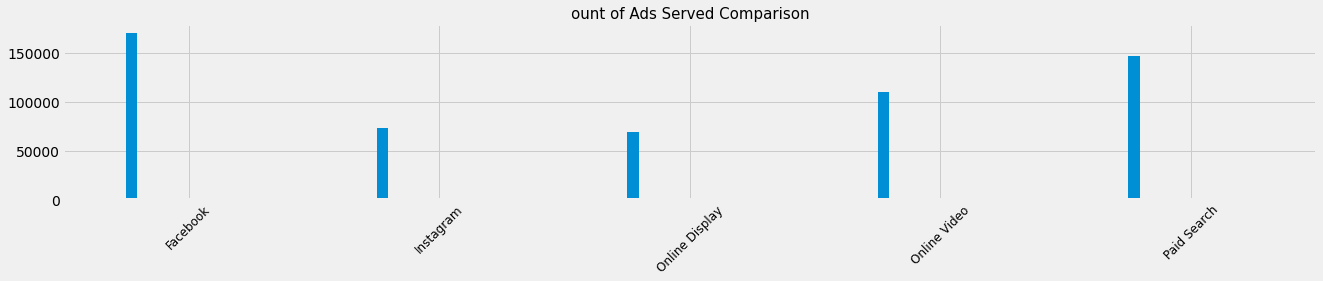

In [72]:
plt.style.use('fivethirtyeight')

conversion_df.unstack(level=0).plot(kind='bar',y='ads_served',figsize=(20,3))

plt.title("ount of Ads Served Comparison",size=15)
plt.xlabel("")
plt.xticks(rotation=45, size=12)
plt.legend([],[], frameon=False)

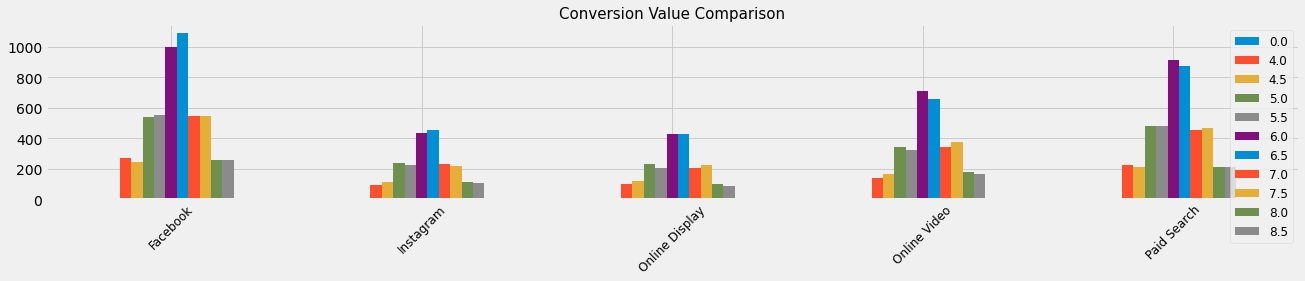

In [67]:
plt.style.use('fivethirtyeight')

conversion_df.unstack(level=0).plot(kind='bar',y='conversions',figsize=(20,3))

plt.title("Conversion Value Comparison",size=15)
plt.xlabel("")
plt.xticks(rotation=45, size=12)
plt.legend(loc='upper right',fontsize=12);

### Retention Rate

In [74]:
converted_df=df[df['conversion']==1]

In [77]:
total_subs=converted_df['cookie'].nunique()
retained_subs=converted_df.loc[converted_df['conversion']==1]['cookie'].nunique()
print("Retention Rate: {}%".format(100*round(retained_subs/total_subs,1)))

Retention Rate: 100.0%


The same user 100% will retained to see the market again

## Conclusions
- Overall conversions among all channels are similar which around 3%, however the same user will retained to see the market with 100% probability.
- The higher ads is served, the higher conversions.
- Facebook has the best consistancy and highest conversions rate

# Segmentation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from scipy.cluster.hierarchy import linkage,dendrogram

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
#importing data
data_original=pd.read_excel(r"/content/drive/MyDrive/Assignment/Copy of Online Retail - Customer Segmentation.xlsx")
data_original.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365.0,22752.0,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365.0,21730.0,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366.0,22633.0,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366.0,22632.0,HAND WARMER RED POLKA DOT,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367.0,84879.0,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Data understanding and cleaning

In [182]:
data =data_original.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB


**Check Duplicate Data**

In [183]:
data.duplicated().sum()

5268

In [184]:
data.drop_duplicates(inplace=True)

Check null Data

In [185]:
#check null values
data_null = data.isnull().sum().reset_index()

In [186]:

data_null.columns = ['feature','missing_value']

In [187]:

data_null['percentage'] = round((data_null['missing_value']/len(data))*100,2)
data_null

,feature,missing_value,percentage
0,InvoiceNo,0,0.00
1,StockCode,0,0.00
2,Description,1454,0.27
3,Quantity,0,0.00
4,InvoiceDate,0,0.00
5,UnitPrice,0,0.00
6,CustomerID,135037,25.16
7,Country,0,0.00


we see that almost 25% customer id is missing, thus we could drop this feature because it's not used for analysis

In [64]:
data['CustomerID'].value_counts()

17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
18068.0       1
13256.0       1
15590.0       1
16138.0       1
15389.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [189]:
data.dropna(inplace=True)

In [190]:
# data = data.drop('CustomerID', axis=1)
data = data.drop('Description', axis=1)

In [191]:
print('Unique stock code: {}'.format(data['StockCode'].nunique()))

Unique stock code: 3684


In [192]:
data.drop(columns=['InvoiceNo','StockCode'], inplace=True) #invoice no is not used in this case

In [193]:
data.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Check value correctness

In [194]:
len(data.loc[data['Quantity']<1])

8872

In [195]:
len(data.loc[data['UnitPrice']<0])

0

In [196]:
data.drop(data[data.Quantity < 1].index, inplace=True)
data.drop(data[data.UnitPrice < 0].index, inplace=True)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     392732 non-null  float64       
 1   InvoiceDate  392732 non-null  datetime64[ns]
 2   UnitPrice    392732 non-null  float64       
 3   CustomerID   392732 non-null  float64       
 4   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 26.0+ MB


## EDA

Check Data Distribution

In [198]:
data['InvoiceDate'].agg(['min', 'max'])

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [199]:
data['Quantity'].agg(['min', 'max'])

min        1.0
max    80995.0
Name: Quantity, dtype: float64

In [201]:

le = LabelEncoder()
le.fit(data['CustomerID'])
data['CustomerIDlabel']=le.transform(data['CustomerID'])
data

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerIDlabel
0,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,4017
1,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4017
2,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,4017
3,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4017
4,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4017
...,...,...,...,...,...,...
541904,12.0,2011-12-09 12:50:00,0.85,12680.0,France,271
541905,6.0,2011-12-09 12:50:00,2.10,12680.0,France,271
541906,4.0,2011-12-09 12:50:00,4.15,12680.0,France,271
541907,4.0,2011-12-09 12:50:00,4.15,12680.0,France,271


In [202]:
data['Country'].value_counts()

United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

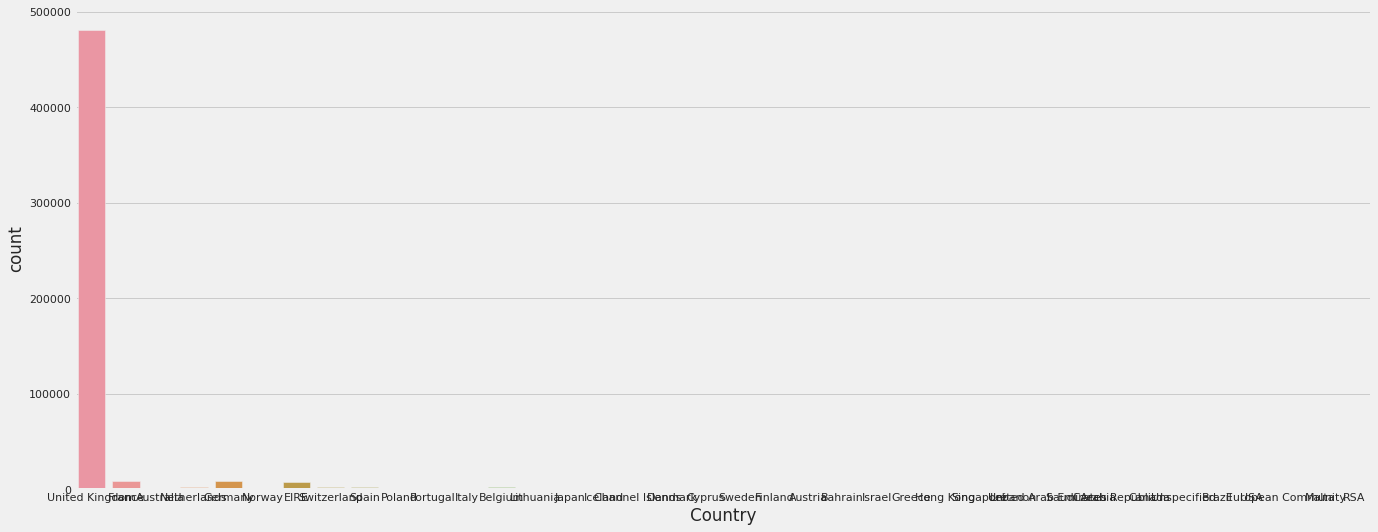

In [77]:
sns.countplot(x='Country', data=data)

Because the country feature is very skewed then is not ideal to include this feature in our analysis

In [203]:
data.drop(columns=['Country'],inplace=True)

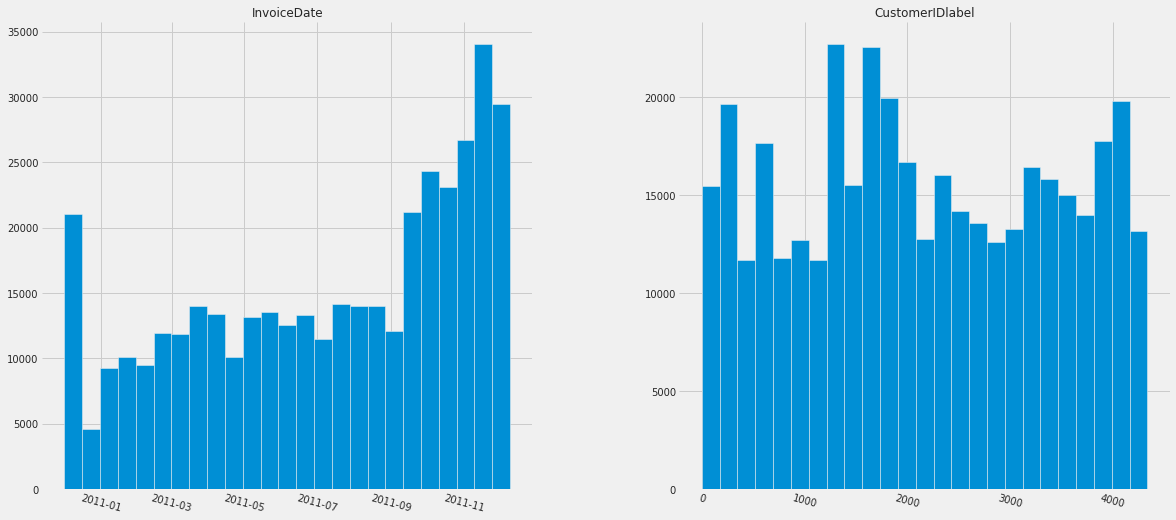

In [208]:
h = data[['InvoiceDate','CustomerIDlabel']].hist(bins=25,figsize=(18,8),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [209]:
#change date time to mount and day
data['mounth'] = pd.to_datetime(data['InvoiceDate']).dt.month

In [210]:
data['day'] =pd.to_datetime(data['InvoiceDate']).dt.dayofweek

In [211]:
data['hour'] =pd.to_datetime(data['InvoiceDate']).dt.hour

In [212]:
numeric_data = data[['hour','day','mounth','Quantity','UnitPrice','CustomerIDlabel']].copy()

In [213]:
feat_num = list(numeric_data)

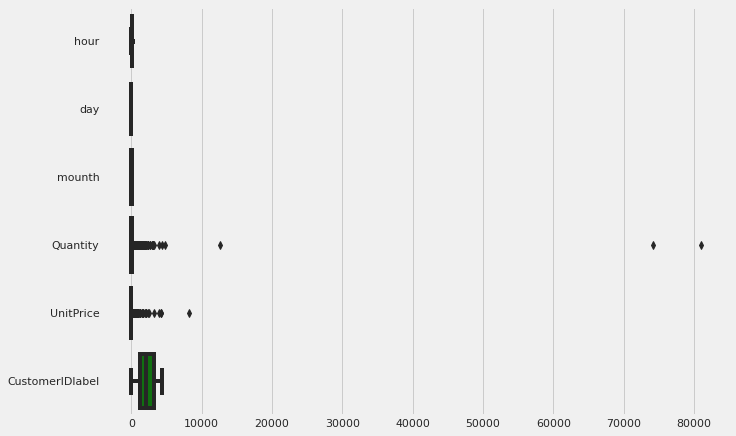

In [214]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=numeric_data,color='green',orient='h')

Check Outlier with IQR method

In [215]:
IQR_quantity= data['Quantity'].quantile(0.75) -  data['Quantity'].quantile(0.25)

In [216]:
IQR_UnitPrice= data['UnitPrice'].quantile(0.75) -  data['UnitPrice'].quantile(0.25)

In [217]:
## Calculating the normal boundaries
lower_bridge_quantity=  data['Quantity'].quantile(0.25)-(IQR_quantity*1.5)
upper_bridge_quantity=  data['Quantity'].quantile(0.75)+(IQR_quantity*1.5)
print(lower_bridge_quantity), print(upper_bridge_quantity)

-13.0
27.0


(None, None)

In [218]:
## Calculating the extreme boundaries
lower_bridge_unitprice=  data['UnitPrice'].quantile(0.25)-(IQR_UnitPrice*1.5)
upper_bridge_unitprice=  data['UnitPrice'].quantile(0.75)+(IQR_UnitPrice*1.5)
print(lower_bridge_unitprice), print(upper_bridge_unitprice)

-2.5
7.5


(None, None)

Remove outlier

Because there is a lot amount of data outside our upper boundary, thus we can still need to use the data by change the data by the mean of it's feature

In [220]:
mean_quantity = data['Quantity'].mean()
mean_unitprice = data['UnitPrice'].mean()

In [221]:
data.loc[data['Quantity']>upper_bridge_quantity,'Quantity'] = mean_quantity
data.loc[data['UnitPrice']>upper_bridge_unitprice,'UnitPrice'] = mean_unitprice

In [235]:
numeric_data = data[['hour','day','mounth','Quantity','UnitPrice']].copy()


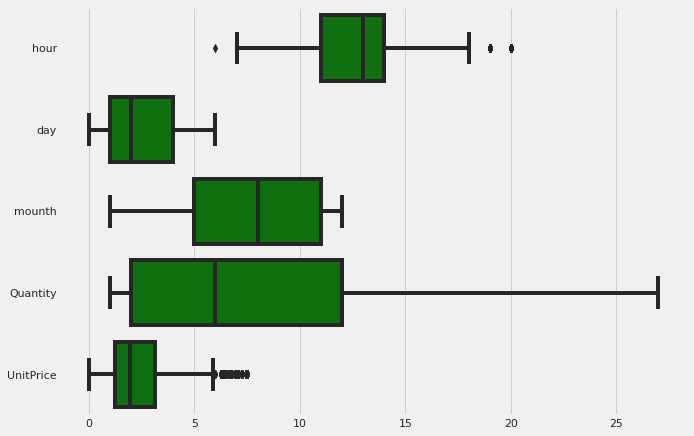

In [236]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=numeric_data,color='green',orient='h')

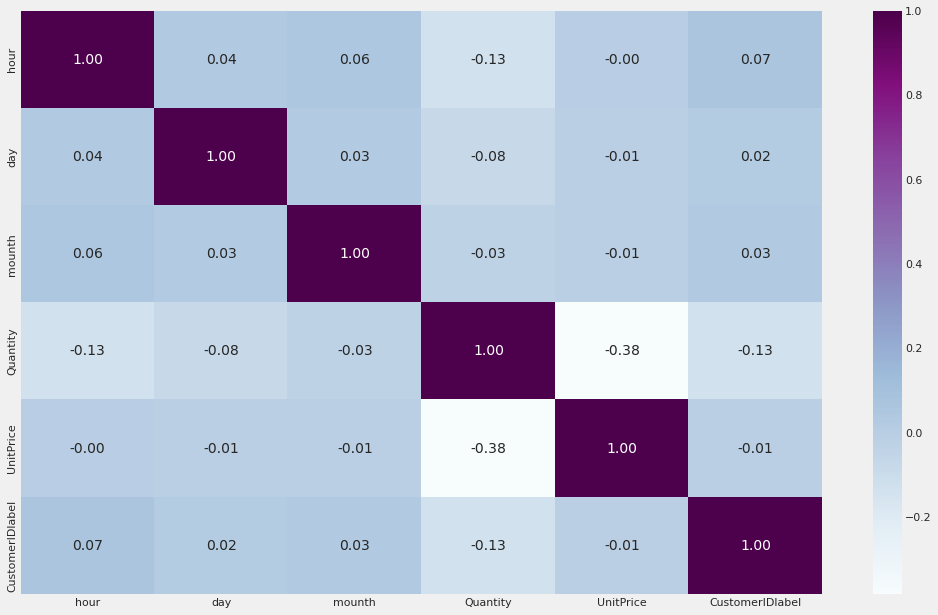

In [224]:
corr_= numeric_data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

Choose which feature will be clustered

In [245]:
# numeric_data = data[['day','mounth','Quantity','UnitPrice','hour']].copy()
numeric_data = data[['CustomerIDlabel','Quantity','UnitPrice']].copy() 

In [226]:

# le = LabelEncoder()
# le.fit(numeric_data['Country'])
# numeric_data['Country']=le.transform(numeric_data['Country'])
# numeric_data

In [227]:
numeric_data

,CustomerIDlabel,Quantity,UnitPrice
0,4017,6.0,2.55
1,4017,6.0,3.39
2,4017,8.0,2.75
3,4017,6.0,3.39
4,4017,6.0,3.39
...,...,...,...
541904,271,12.0,0.85
541905,271,6.0,2.10
541906,271,4.0,4.15
541907,271,4.0,4.15


## Scaling

In [228]:
sc_data = MinMaxScaler()
data_std = sc_data.fit_transform(numeric_data.astype(float))

In [229]:
data_std

array([[0.92600277, 0.19230769, 0.34      ],
       [0.92600277, 0.19230769, 0.452     ],
       [0.92600277, 0.26923077, 0.36666667],
       ...,
       [0.06247118, 0.11538462, 0.55333333],
       [0.06247118, 0.11538462, 0.55333333],
       [0.06247118, 0.07692308, 0.66      ]])

## Modeling

https://scikit-learn.org/stable/modules/mixture.html#mixture

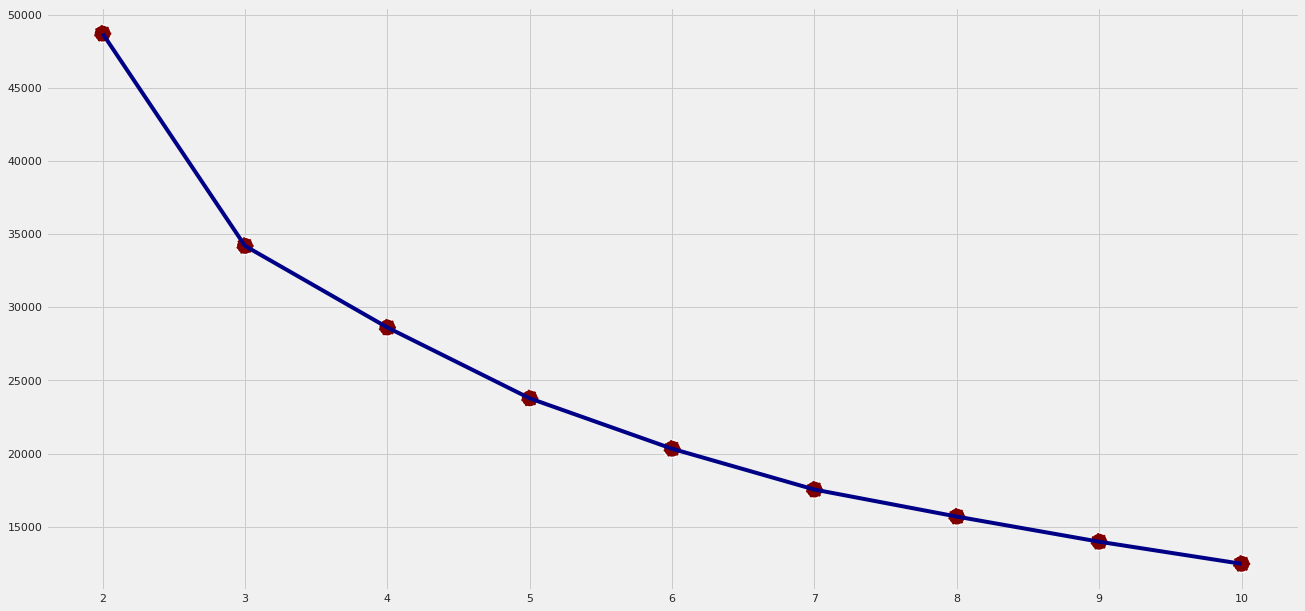

In [230]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


### Kmeans

In [231]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_std)

In [232]:
df_data_std_kmeans = pd.DataFrame(data=data_std, columns=list(numeric_data))
df_data_std_kmeans['clusters'] = kmeans.labels_
data['clusters'] = kmeans.labels_

In [233]:
# data['Day'] = numeric_data['day']

In [177]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

by customer

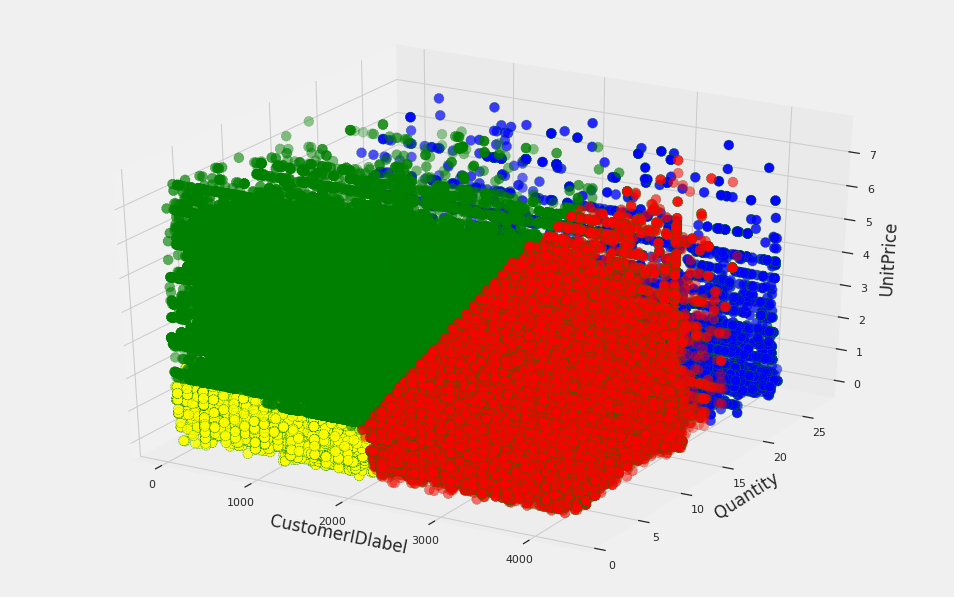

In [234]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.CustomerIDlabel[data.clusters == 0], data["Quantity"][data.clusters == 0], data["UnitPrice"][data.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.CustomerIDlabel[data.clusters == 1], data["Quantity"][data.clusters == 1], data["UnitPrice"][data.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.CustomerIDlabel[data.clusters == 2], data["Quantity"][data.clusters == 2], data["UnitPrice"][data.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.CustomerIDlabel[data.clusters == 3], data["Quantity"][data.clusters == 3], data["UnitPrice"][data.clusters == 3], c='yellow', s=100, edgecolor='green',linestyle='--')


plt.xlabel("CustomerIDlabel")
plt.ylabel("Quantity")
ax.set_zlabel('UnitPrice')
plt.show()

by hours

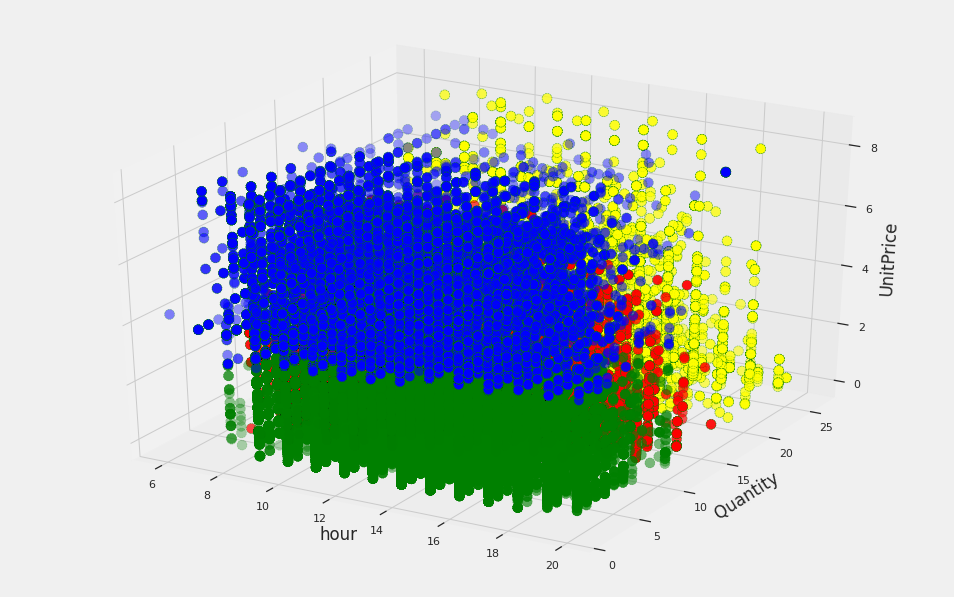

In [178]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.hour[data.clusters == 0], data["Quantity"][data.clusters == 0], data["UnitPrice"][data.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.hour[data.clusters == 1], data["Quantity"][data.clusters == 1], data["UnitPrice"][data.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.hour[data.clusters == 2], data["Quantity"][data.clusters == 2], data["UnitPrice"][data.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.hour[data.clusters == 3], data["Quantity"][data.clusters == 3], data["UnitPrice"][data.clusters == 3], c='yellow', s=100, edgecolor='green',linestyle='--')


plt.xlabel("hour")
plt.ylabel("Quantity")
ax.set_zlabel('UnitPrice')
plt.show()

### GMM

In [238]:
gmm = GaussianMixture(n_components=4)

In [239]:
gmm.fit(data_std)

GaussianMixture(n_components=4)

In [240]:
labels = gmm.predict(data_std) 
# data['clusters'] = gmm.labels_

In [242]:
len(labels)

392732

In [246]:
df_data_std = pd.DataFrame(data=data_std, columns=list(numeric_data))
df_data_std['clusters'] = labels
data['clusters'] = labels

In [247]:
df_data_std['clusters'].value_counts()

3    181252
2    107249
1     54252
0     49979
Name: clusters, dtype: int64

by customer

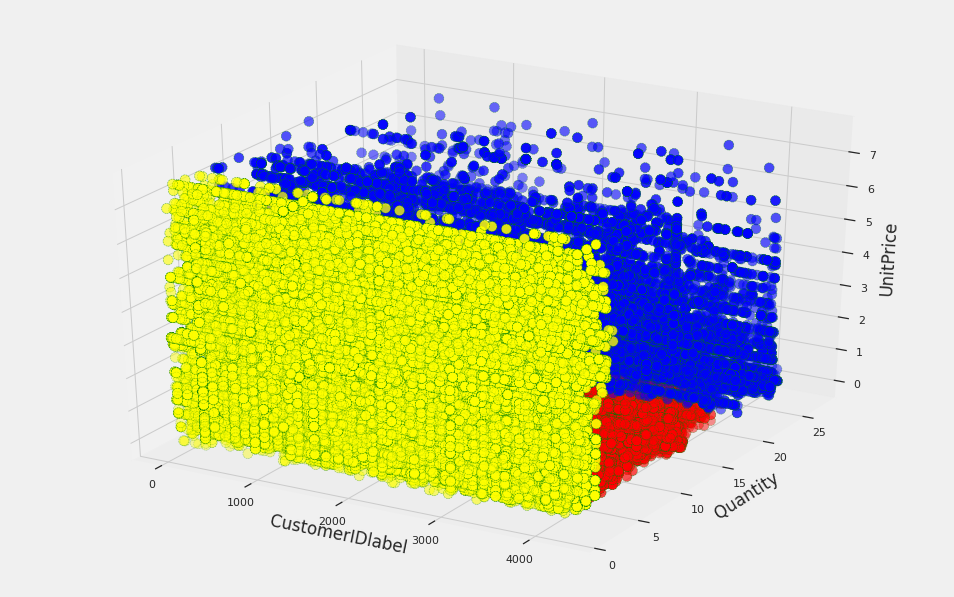

In [248]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.CustomerIDlabel[data.clusters == 0], data["Quantity"][data.clusters == 0], data["UnitPrice"][data.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.CustomerIDlabel[data.clusters == 1], data["Quantity"][data.clusters == 1], data["UnitPrice"][data.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.CustomerIDlabel[data.clusters == 2], data["Quantity"][data.clusters == 2], data["UnitPrice"][data.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.CustomerIDlabel[data.clusters == 3], data["Quantity"][data.clusters == 3], data["UnitPrice"][data.clusters == 3], c='yellow', s=100, edgecolor='green',linestyle='--')


plt.xlabel("CustomerIDlabel")
plt.ylabel("Quantity")
ax.set_zlabel('UnitPrice')
plt.show()

by hour

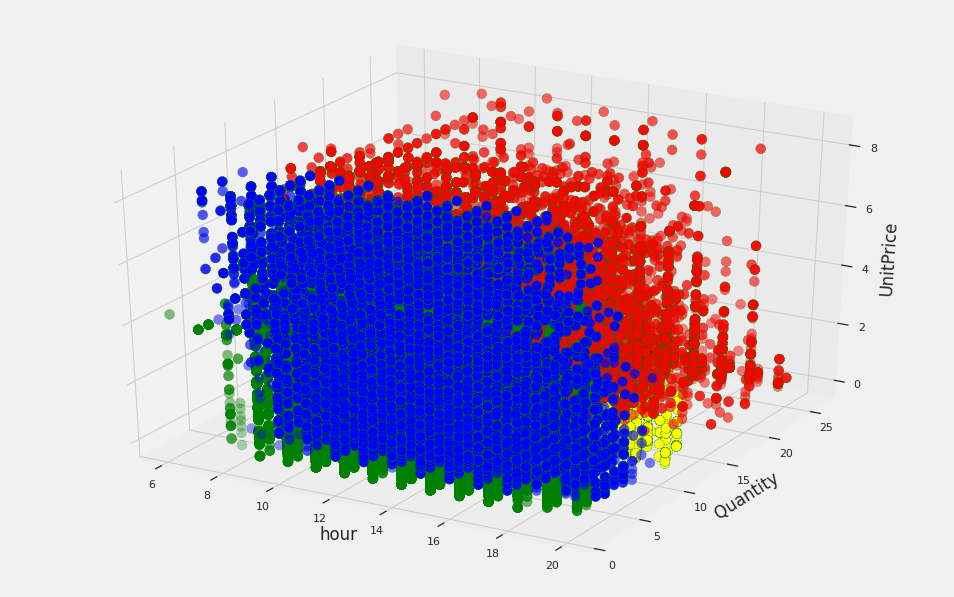

In [173]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.hour[data.clusters == 0], data["Quantity"][data.clusters == 0], data["UnitPrice"][data.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.hour[data.clusters == 1], data["Quantity"][data.clusters == 1], data["UnitPrice"][data.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.hour[data.clusters == 2], data["Quantity"][data.clusters == 2], data["UnitPrice"][data.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.hour[data.clusters == 3], data["Quantity"][data.clusters == 3], data["UnitPrice"][data.clusters == 3], c='yellow', s=100, edgecolor='green',linestyle='--')


plt.xlabel("hour")
plt.ylabel("Quantity")
ax.set_zlabel('UnitPrice')
plt.show()

In [251]:
# pca = PCA(n_components=2)

# pca.fit(data_std)
# pcs = pca.transform(data_std)

# data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
# data_pca['clusters'] = data['clusters']
# data_pca = data_pca.sample(10000)

In [252]:
# len(data_pca)

In [253]:
# fig, ax = plt.subplots(figsize=(15,10))

# sns.scatterplot(
#     x="PC 1", y="PC 2",
#     hue="clusters",
#     edgecolor='green',
#     linestyle='--',
#     data=data_pca,
#     palette=['blue','red','green','yellow'],
#     s=160,
#     ax=ax
# )